In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

First, we import the data from the csv file

In [ ]:
train = pd.read_csv(r"C:\Users\Shubham\Desktop\Projects\DataTrained\Week 3\bigdatamart_rep-master\bigdatamart_Train.csv")
test = pd.read_csv(r"C:\Users\Shubham\Desktop\Projects\DataTrained\Week 3\bigdatamart_rep-master\bigdatamart_Test.csv")

Let us look into the data more closely

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print(train.shape, test.shape)

(8523, 12) (5681, 11)


We see that the target variable column, 'Item_Outlet_Sales' is what is missing from the test file

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Only 5 columns ping up in describe function, that is because only these 5 are numerical columns

From the above data we can see the numerical data, other categorical values from the data are:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

Now we look into the null values

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In both the dataset, we have null values for two columns, Item_Weight and Outlet_Size. We shall treat the dataset for the null values. But us produce it in visualization

<AxesSubplot:>

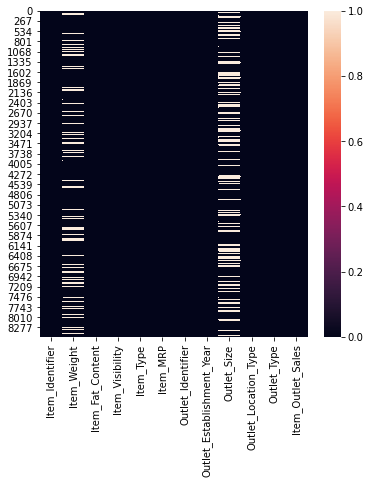

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(train.isnull())

<AxesSubplot:>

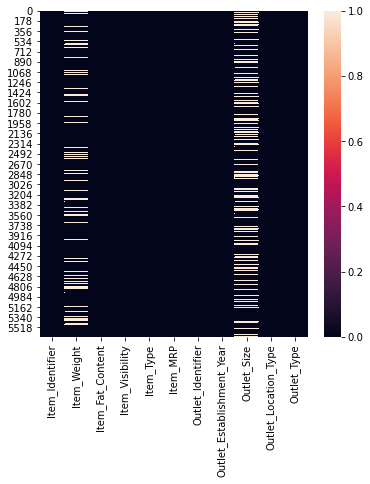

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(test.isnull())

We will treat the item weight null values with the mean whereas the outlet size with the mode

In [ ]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

Let us calculate the mode of the outlet size in referance to outlet type

In [ ]:
modedata = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
modedata

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
loct = train['Outlet_Size'].isnull()

In [ ]:
loct

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [ ]:
train.loc[loct,'Outlet_Size'] = train.loc[loct, 'Outlet_Type'].apply(lambda x: modedata[x])

In [ ]:
train['Outlet_Size']

0       Medium
1       Medium
2       Medium
3        Small
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

Let us check for null values again

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

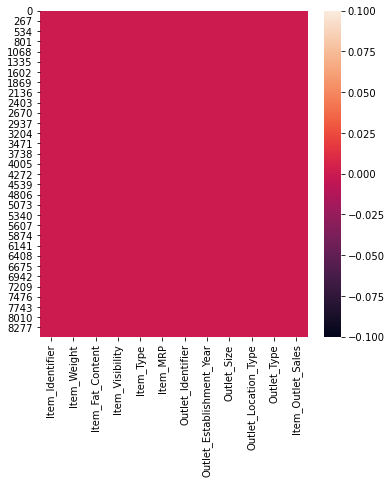

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(train.isnull())
plt.show()

Let us do the same for the test data

In [ ]:
mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc={lambda x: x.mode()})
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
<lambda>,Small,Small,Medium,Medium


In [ ]:
loc = test['Outlet_Size'].isnull()

In [ ]:
test.loc[loc,'Outlet_Size'] = test.loc[loc, 'Outlet_Type'].apply(lambda x: mode[x])

Let us check for null values for test data

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

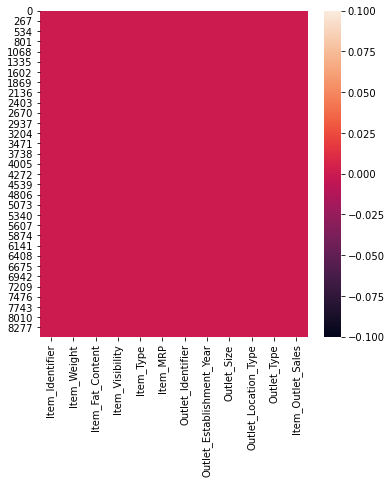

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(train.isnull())
plt.show()

# Exploratory Data Analysis

Let us look into each of the numerical columns one-by-one

In [ ]:
import warnings
warnings.filterwarnings('ignore')

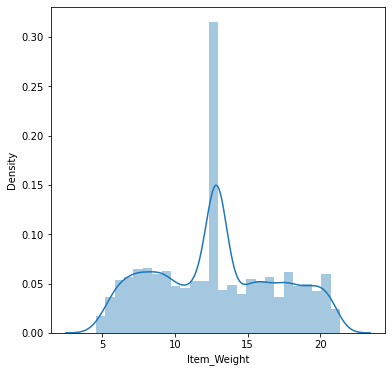

In [ ]:
# Column we look into is the Item_Weight
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Weight'])
plt.show()

We have a peak at the mean value that is because we filled all the null values with the mean. Let us look into the same in a boxplot

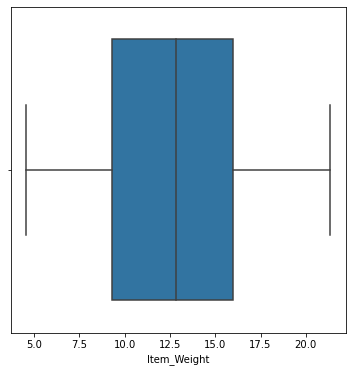

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(train['Item_Weight'])
plt.show()

We can note there are skewness but no outliers in the data

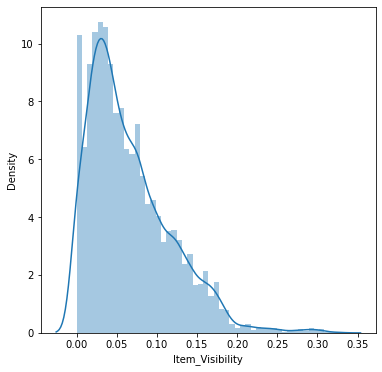

In [ ]:
# Column we look into is the Item_Visibility
plt.figure(figsize=(6,6))
sns.distplot(train['Item_Visibility'])
plt.show()

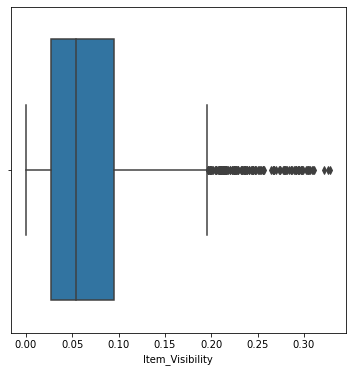

In [ ]:
# Boxplot
plt.figure(figsize=(6,6))
sns.boxplot(train['Item_Visibility'])
plt.show()

We can note there are skewness and outliers in the data

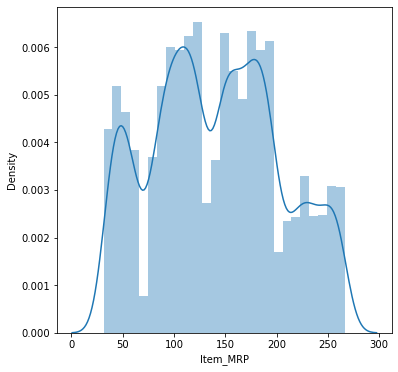

In [ ]:
# Column we look into is the Item_MRP
plt.figure(figsize=(6,6))
sns.distplot(train['Item_MRP'])
plt.show()

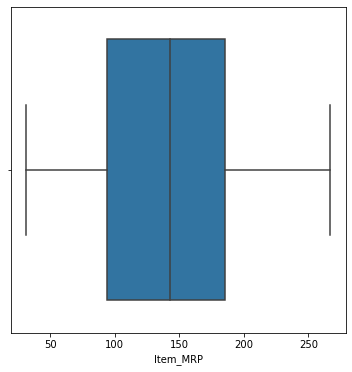

In [ ]:
# Boxplot
plt.figure(figsize=(6,6))
sns.boxplot(train['Item_MRP'])
plt.show()

We can note there is no skewness and no outliers in the data

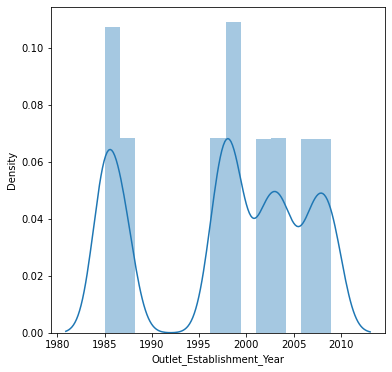

In [ ]:
# Column we look into is the Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.distplot(train['Outlet_Establishment_Year'])
plt.show()

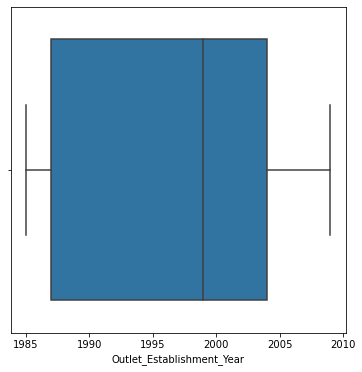

In [ ]:
# Boxplot
plt.figure(figsize=(6,6))
sns.boxplot(train['Outlet_Establishment_Year'])
plt.show()

We can note there is little skewness and no outliers in the data

Now, let us look into the categorical columns

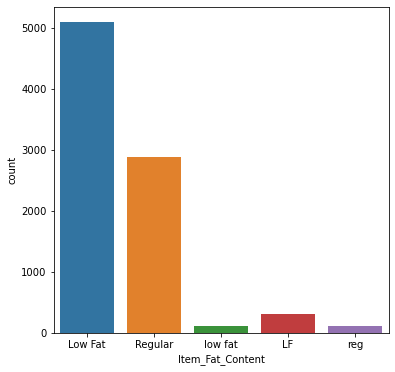

In [ ]:
# Column we look into is the Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(train['Item_Fat_Content'])
plt.show()

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Here we can see different notations for the same data. Let us treat it right away for both train and test data

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(to_replace={'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [ ]:
# Check if the data is affected
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# We do the same for the test data
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(to_replace={'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

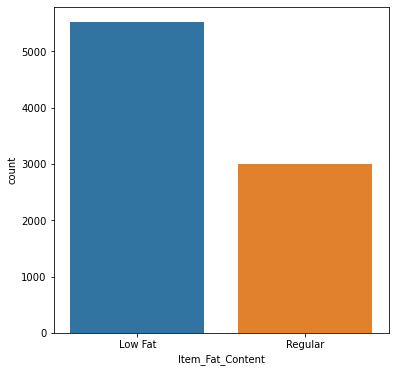

In [ ]:
#Let us do the visualization again
plt.figure(figsize=(6,6))
sns.countplot(train['Item_Fat_Content'])
plt.show()

<Figure size 432x432 with 0 Axes>

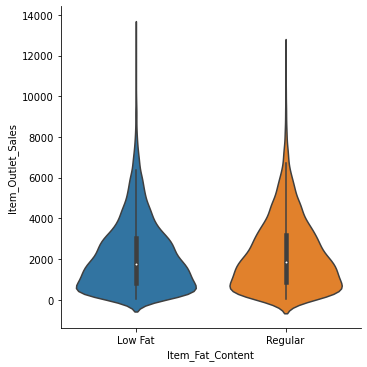

In [ ]:
# Violin
plt.figure(figsize=(6,6))
sns.catplot(x="Item_Fat_Content", y="Item_Outlet_Sales", kind="violin", data=train)
plt.show()

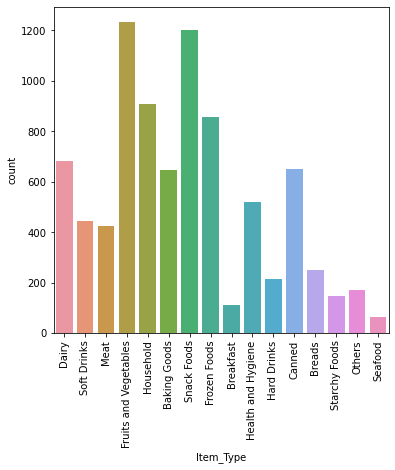

In [ ]:
# Column we look into is the Item_Fat_Content
plt.figure(figsize=(6,6))
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)
plt.show()

<Figure size 864x864 with 0 Axes>

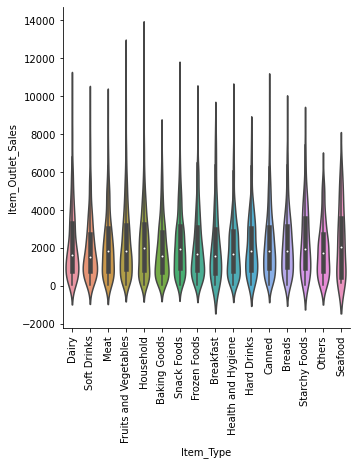

In [ ]:
# Violin
plt.figure(figsize=(12,12))
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", kind="violin", data=train)
plt.xticks(rotation=90)
plt.show()

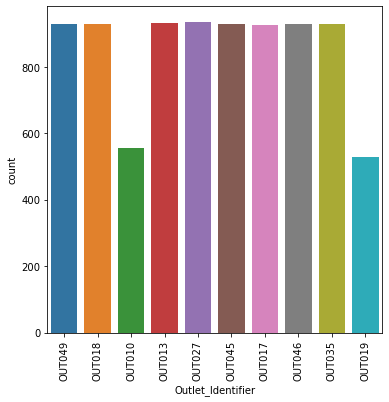

In [ ]:
# Column we look into is the Outlet_Identifier
plt.figure(figsize=(6,6))
sns.countplot(train['Outlet_Identifier'])
plt.xticks(rotation=90)
plt.show()

<Figure size 864x864 with 0 Axes>

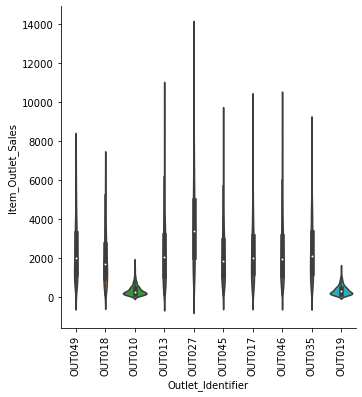

In [ ]:
# Violin
plt.figure(figsize=(12,12))
sns.catplot(x="Outlet_Identifier", y="Item_Outlet_Sales", kind="violin", data=train)
plt.xticks(rotation=90)
plt.show()

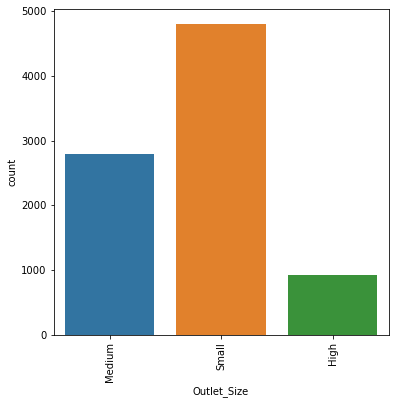

In [ ]:
# Column we look into is the Outlet_Size
plt.figure(figsize=(6,6))
sns.countplot(train['Outlet_Size'])
plt.xticks(rotation=90)
plt.show()

<Figure size 864x864 with 0 Axes>

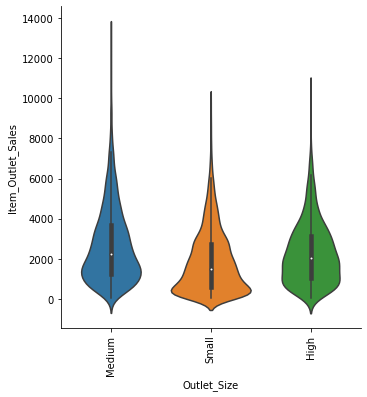

In [ ]:
# Violin
plt.figure(figsize=(12,12))
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind="violin", data=train)
plt.xticks(rotation=90)
plt.show()

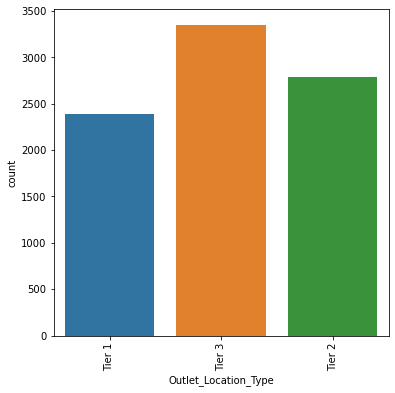

In [ ]:
# Column we look into is the Outlet_Location_Type
plt.figure(figsize=(6,6))
sns.countplot(train['Outlet_Location_Type'])
plt.xticks(rotation=90)
plt.show()

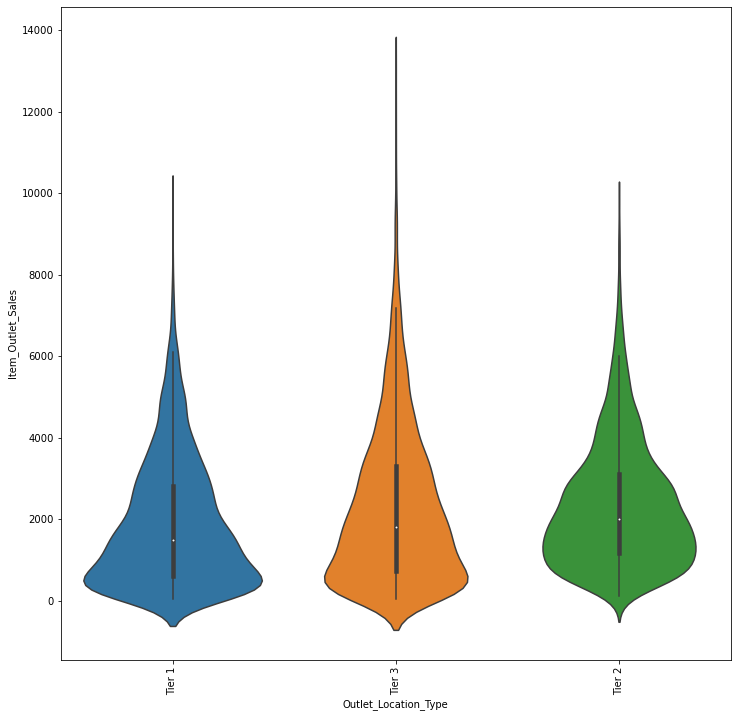

In [ ]:
# Violin
plt.figure(figsize=(12,12))
sns.violinplot(x=train['Outlet_Location_Type'],y=train["Item_Outlet_Sales"])
plt.xticks(rotation=90)
plt.show()

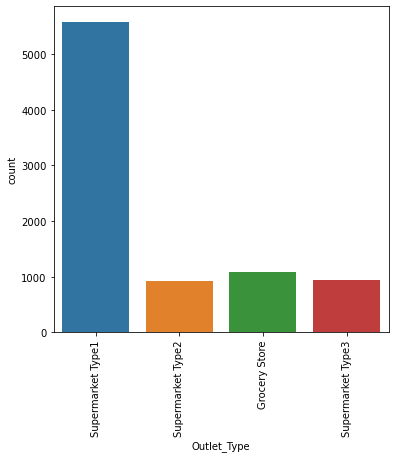

In [ ]:
# Column we look into is the Outlet_Type
plt.figure(figsize=(6,6))
sns.countplot(train['Outlet_Type'])
plt.xticks(rotation=90)
plt.show()

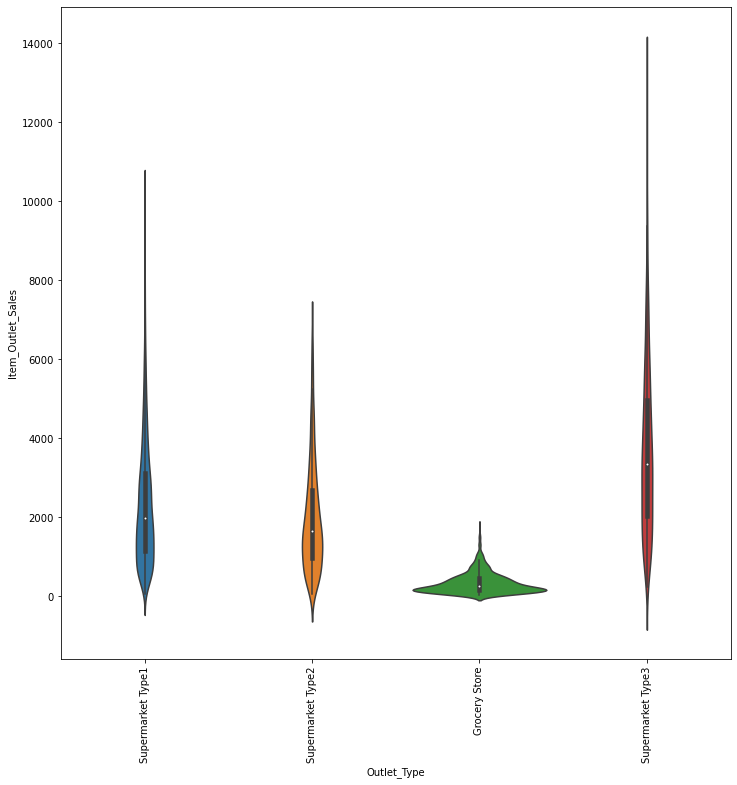

In [ ]:
# Violin
plt.figure(figsize=(12,12))
sns.violinplot(x=train['Outlet_Type'],y=train["Item_Outlet_Sales"])
plt.xticks(rotation=90)
plt.show()

# Label Encoding

Let us convert all the categorical data into numerical data through label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Let us convert all the categorical data of the train dataset

In [ ]:
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = le.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = le.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])
train['Item_Identifier'] = le.fit_transform(train['Item_Identifier'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


We do the same for test data

In [ ]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])
test['Item_Type'] = le.fit_transform(test['Item_Type'])
test['Outlet_Identifier'] = le.fit_transform(test['Outlet_Identifier'])
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type'] = le.fit_transform(test['Outlet_Type'])
test['Item_Identifier'] = le.fit_transform(test['Item_Identifier'])

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   int32  
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int32  
 9   Outlet_Location_Type       5681 non-null   int32  
 10  Outlet_Type                5681 non-null   int32  
dtypes: float64(3), int32(7), int64(1)
memory usage: 333.0 KB


# Correlation

Now we have converted all the data into numerical values, let us look into the correlation

In [ ]:
train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001262,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001229,-0.014105,-0.001262,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367


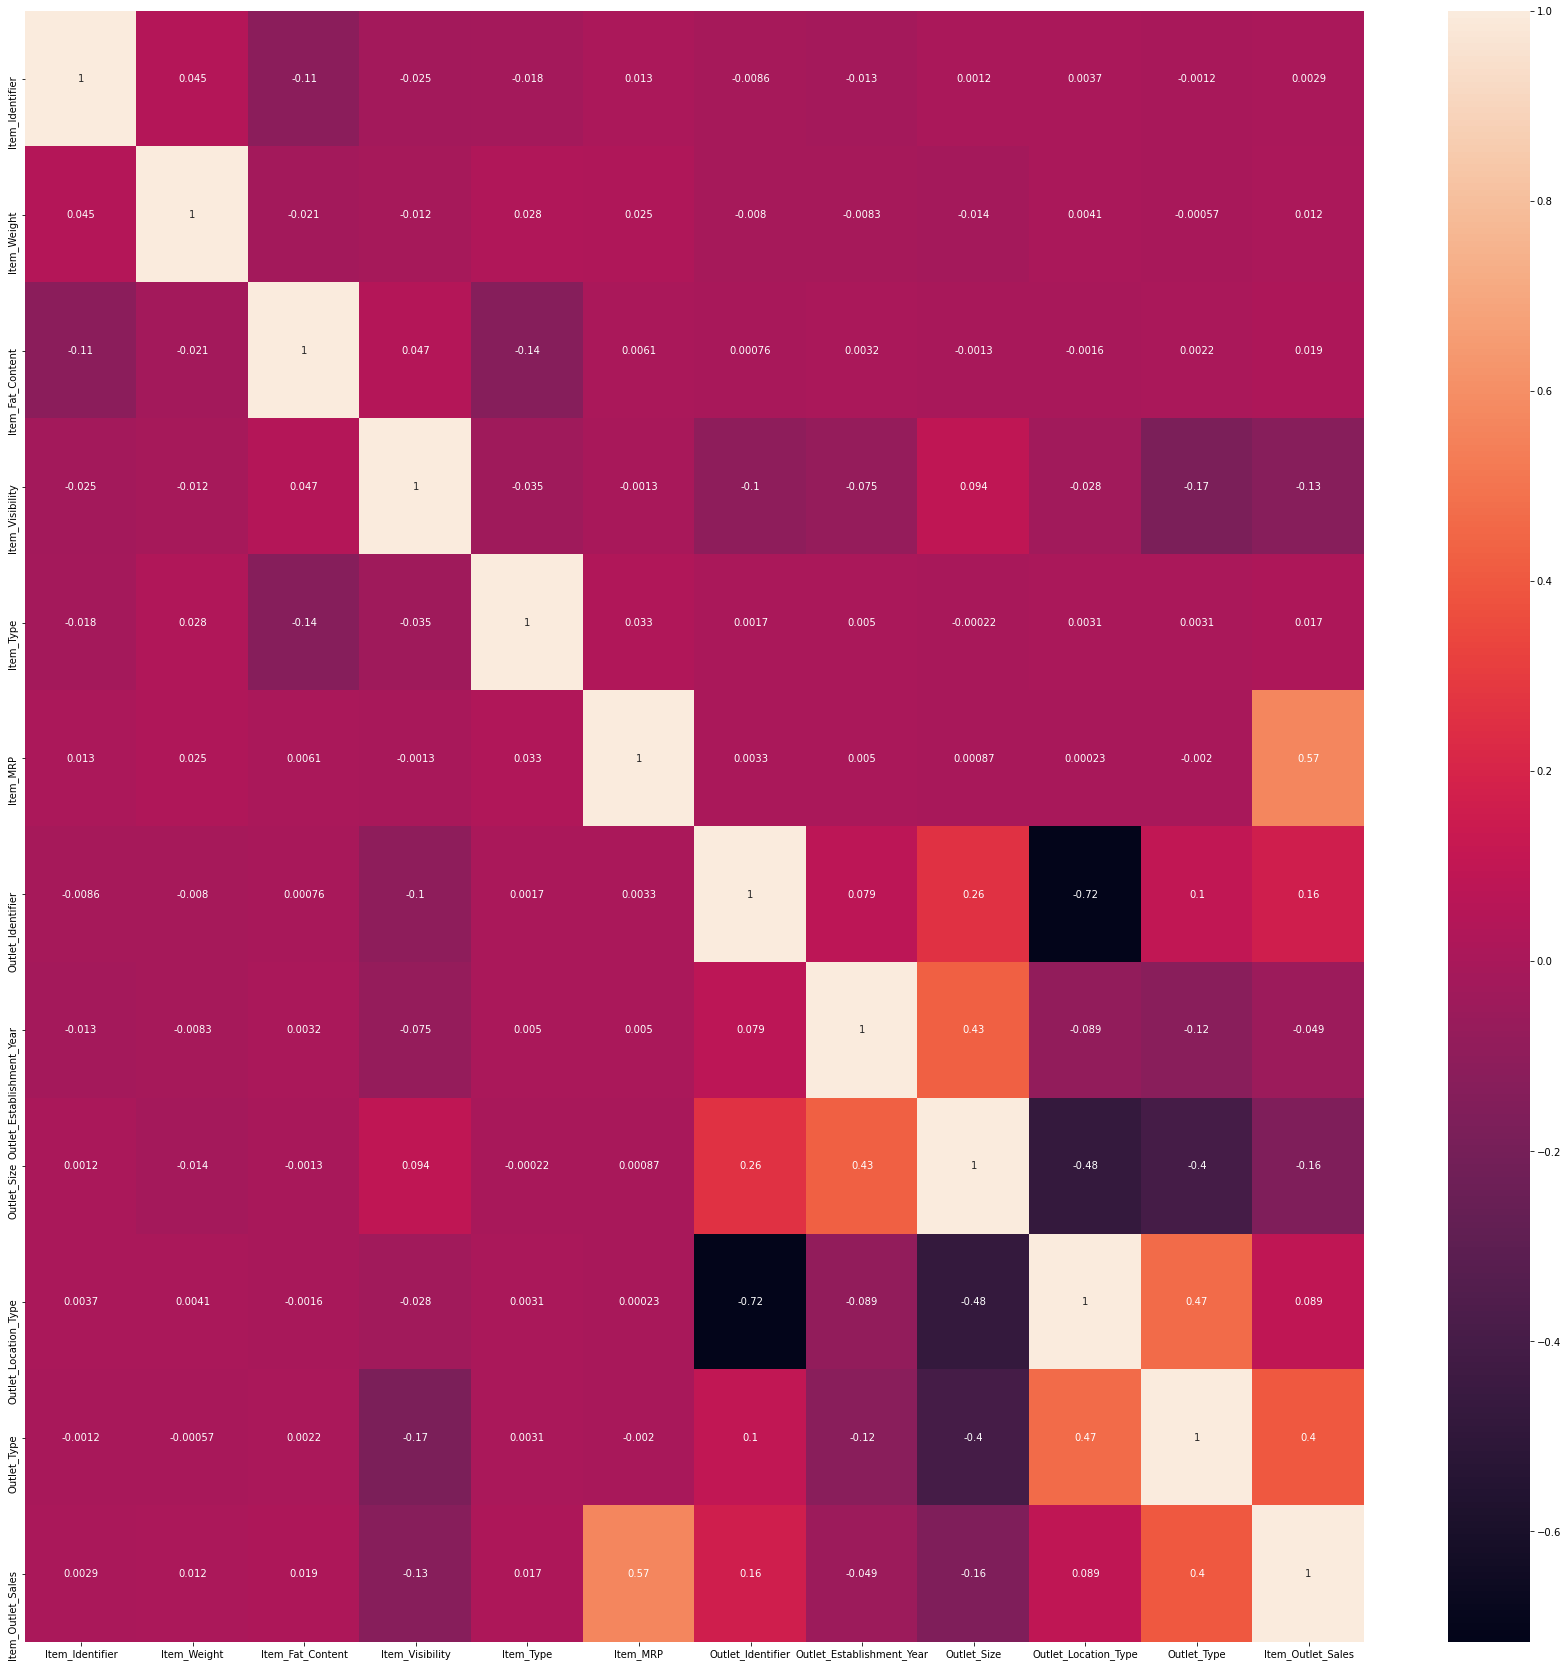

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),annot=True)
plt.show()

We see that the Item_MRP and Outlet_Type has the highest correlation

# Removing Outliers

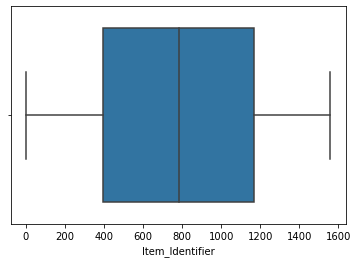

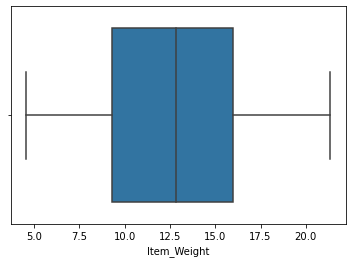

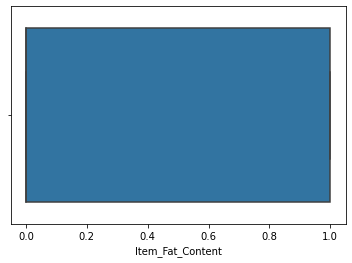

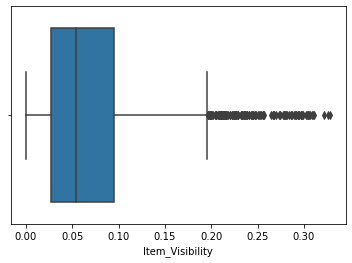

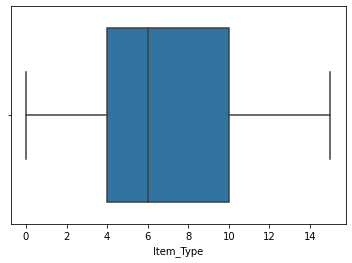

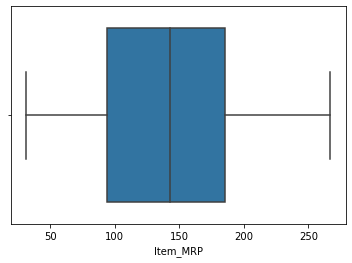

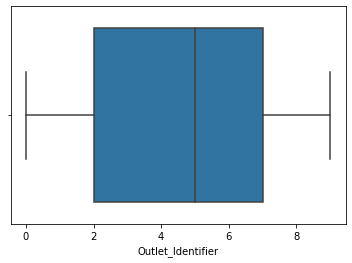

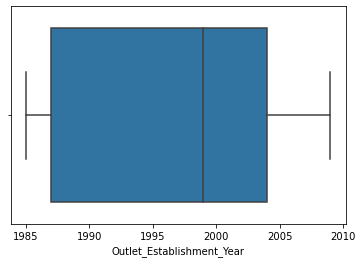

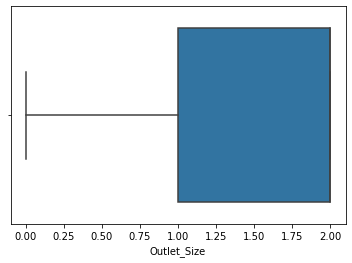

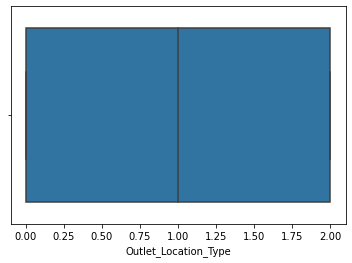

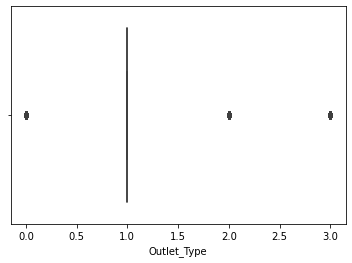

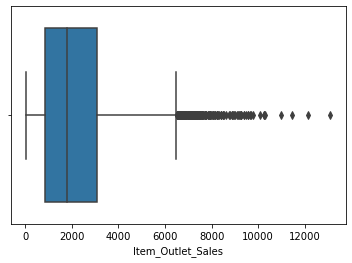

In [ ]:
for i in train.columns:
    sns.boxplot(train[i])
    plt.show()

Applying z_score method to remove outliers

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(train))

In [ ]:
z.shape

(8523, 12)

We take a zscore threshold of 3 to treat for outlier

In [ ]:
train = train[(z<3).all(axis=1)]

In [ ]:
train.shape

(8338, 12)

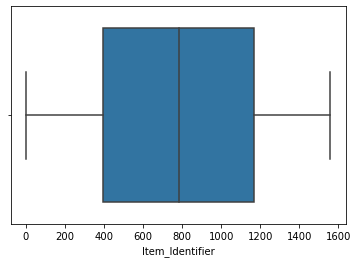

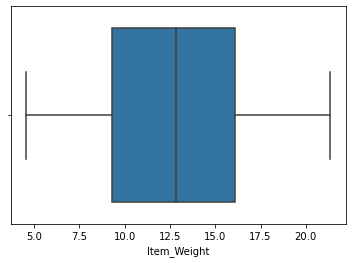

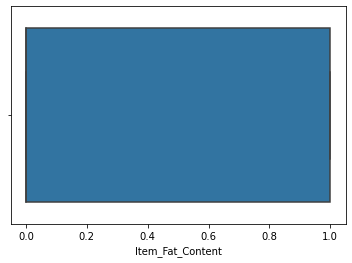

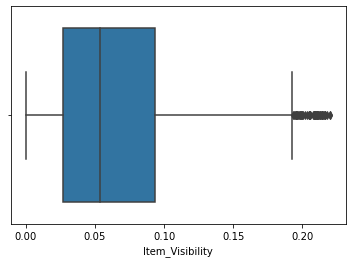

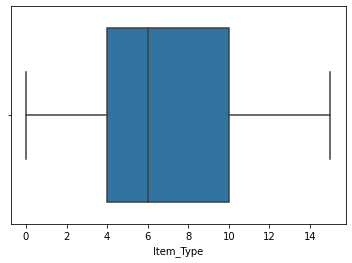

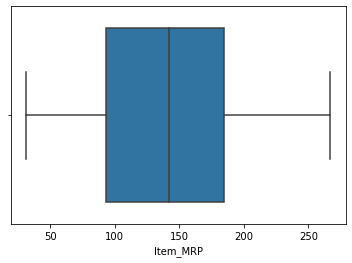

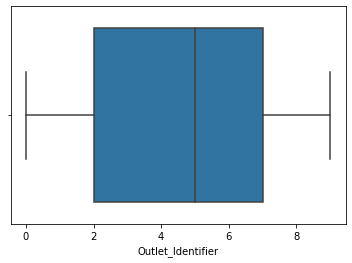

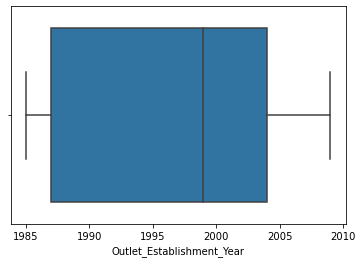

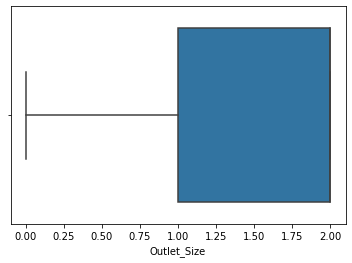

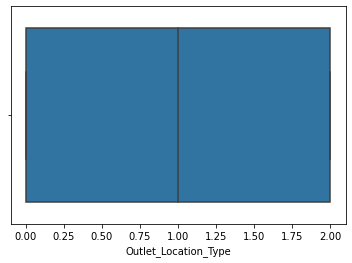

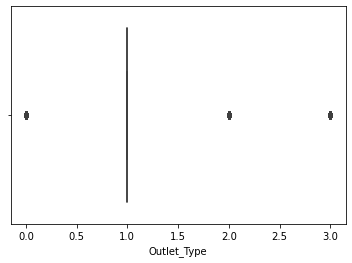

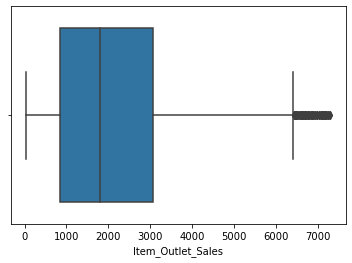

In [ ]:
for i in train.columns:
    sns.boxplot(train[i])
    plt.show()

Most of the outliers have been treated with, remaining are the desired outliers

# Skewness

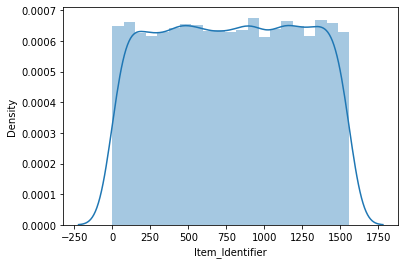

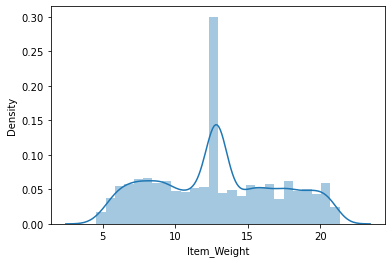

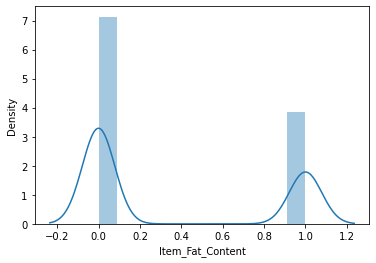

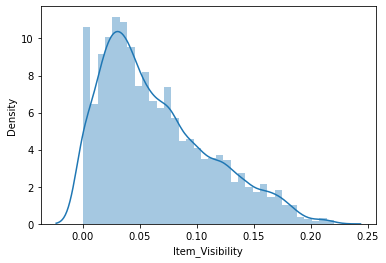

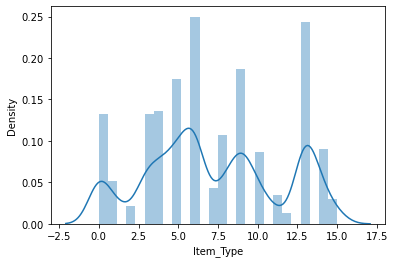

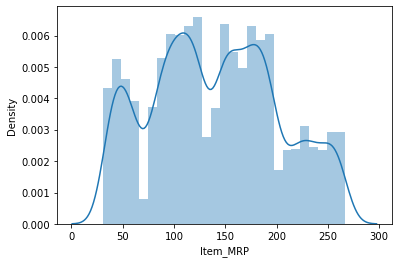

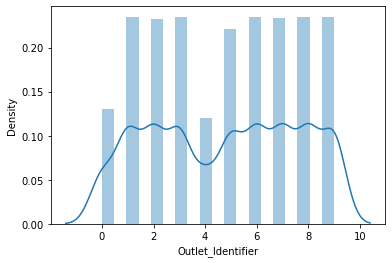

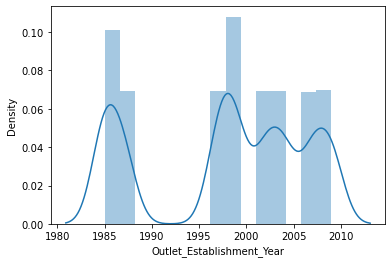

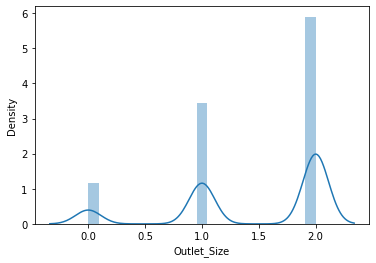

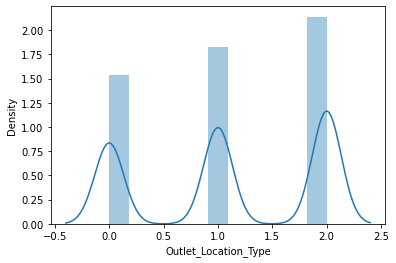

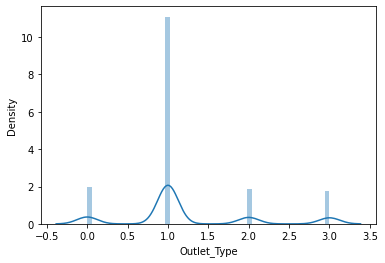

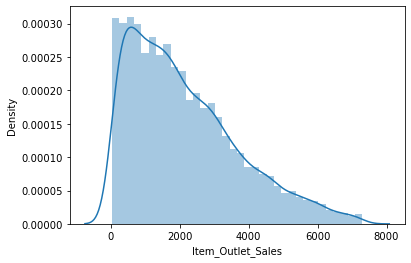

In [ ]:
for i in train.columns:
    sns.distplot(train[i])
    plt.show()

In [ ]:
train.skew()

Item_Identifier             -0.007837
Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.856101
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

In [ ]:
k = []
for i in train.columns:
    k.append(np.abs(train[i].skew()))

In [ ]:
from scipy.stats import yeojohnson

b=0
for i in train.columns:
    if k[b]>0.5:
        train[i] = yeojohnson(train[i])[0]
    b+=1

In [ ]:
train.skew()

Item_Identifier             -0.007837
Item_Weight                  0.089291
Item_Fat_Content             0.620973
Item_Visibility              0.115911
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.461359
Outlet_Location_Type        -0.202674
Outlet_Type                  0.010691
Item_Outlet_Sales           -0.094482
dtype: float64

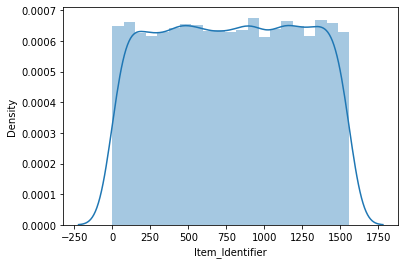

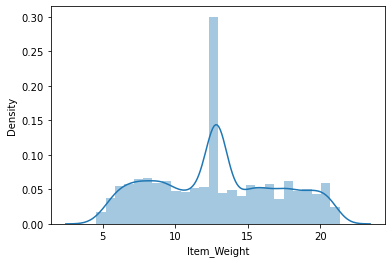

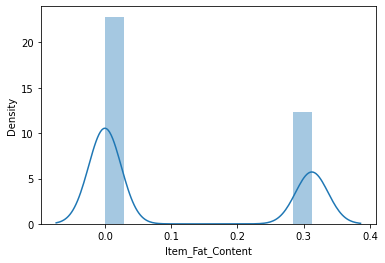

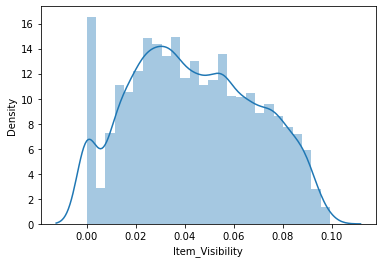

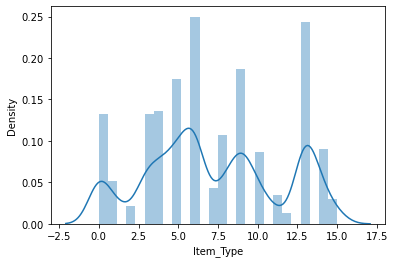

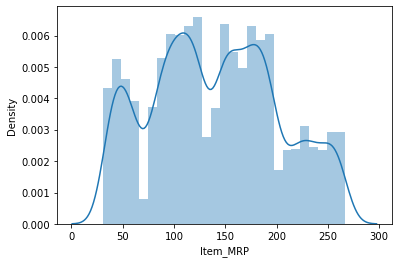

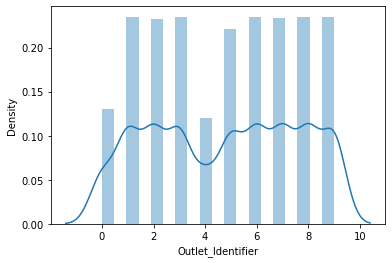

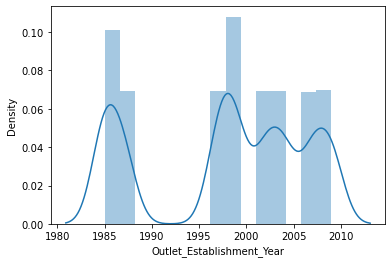

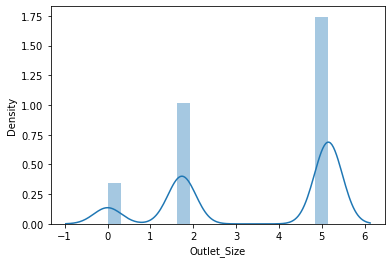

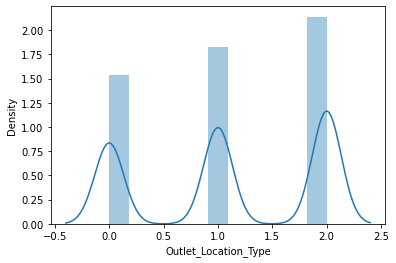

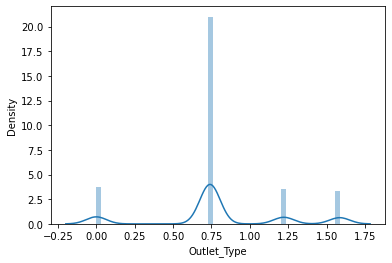

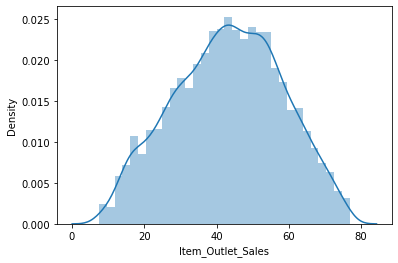

In [ ]:
for i in train.columns:
    sns.distplot(train[i])
    plt.show()

In [ ]:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type','Outlet_Identifier'])

# Scaling Data

First we split the dataset into dependent and independent variables

In [ ]:
x = train.drop(columns='Item_Outlet_Sales')
y = train['Item_Outlet_Sales']

Now we scale the data using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

# Best Random State

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.6937046710459642
Random State: 	 82


# Finding the best Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=82)

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 69.37046710459643
Mean Square Error : 	 73.58374210036334
Root Mean Square Error : 	 8.578096647879606


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 69.35805071577808
Mean Square Error : 	 73.6135709702892
Root Mean Square Error : 	 8.579835136544828


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 37.79148669396493
Mean Square Error : 	 149.44841683319413
Root Mean Square Error : 	 12.224909686095604


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 67.7889830985377
Mean Square Error : 	 77.38306583262758
Root Mean Square Error : 	 8.796764509331119


KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 56.457079148647104
Mean Square Error : 	 104.60659224428787
Root Mean Square Error : 	 10.227736418401086


SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print("r2 score: \t", r2_score(y_test,pred)*100)
print("Mean Square Error : \t", mean_squared_error(y_test,pred))
print("Root Mean Square Error : \t", np.sqrt(mean_squared_error(y_test,pred)))

r2 score: 	 66.68632464564507
Mean Square Error : 	 80.03206918176491
Root Mean Square Error : 	 8.946064452135637


Out of all the models 'Linear Regression' has the highest r2_score

# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Linear Regression is: \t", scr1.mean())

Cross validation score of Linear Regression is: 	 0.6596384324346712


In [ ]:
scr2 = cross_val_score(rr, x, y, cv=5)
print("Cross validation score of Ridge Regression is: \t", scr2.mean())

Cross validation score of Ridge Regression is: 	 0.6595890654203848


In [ ]:
scr3 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree Regressor is: \t", scr3.mean())

Cross validation score of Decision Tree Regressor is: 	 0.3323630014745874


In [ ]:
scr4 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest Regressor is: \t", scr4.mean())

Cross validation score of Random Forest Regressor is: 	 0.640007415621968


In [ ]:
scr5 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNeighbour Regressor is: \t", scr5.mean())

Cross validation score of KNeighbour Regressor is: 	 0.5400548199073273


In [ ]:
scr6 = cross_val_score(svr, x, y, cv=5)
print("Cross validation score of SVM is: \t", scr6.mean())

Cross validation score of SVM is: 	 0.6401917294363829


Out of all the crossvalidations, Linear Regression performs the best

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [ ]:
GridSearchCV.get_params(lr)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [ ]:
parameters = {'copy_X': [True,False],
              'fit_intercept': [True,False],
              'n_jobs': [10,20,30,40,50,None],
              'normalize': [True,False],
              'positive': [True,False]}

In [ ]:
gcv = GridSearchCV(lr, parameters, cv=5, scoring='r2')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [10, 20, 30, 40, 50, None],
                         'normalize': [True, False],
                         'positive': [True, False]},
             scoring='r2')

In [ ]:
gcv.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 10,
 'normalize': True,
 'positive': True}

In [ ]:
print("Tuned Hyperparameters :", gcv.best_params_)
print("Accuracy :",gcv.best_score_)

Tuned Hyperparameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': True, 'positive': True}
Accuracy : 0.6500341833592792


In [ ]:
gcv_pred = gcv.best_estimator_.predict(x_test)
r2_score(y_test,gcv_pred)

0.6936723282105985

# Saving the best model

In [ ]:
import joblib
joblib.dump(gcv.best_estimator_,"BigMartDataSales.pkl")

['BigMartDataSales.pkl']